In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
datatransporte = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/afluencia-preliminar-en-transporte-publico.xlsx.csv' , encoding='utf-8')

ANALISIS EXPLORATORIO!

In [ ]:
datatransporte.tail(20)

In [ ]:
#Cual es la columna con mas datos no nulos
datatransporte.info()

In [ ]:
#Cual es la columna con mas datos no nulos
datatransporte.isnull().sum()

In [ ]:
#llenamos los valores NAN
datatransporte['afluencia_total_preliminar'] = datatransporte['afluencia_total_preliminar'].fillna((0),inplace=False)
datatransporte['afluencia_boleto'] = datatransporte['afluencia_boleto'].fillna((0),inplace=False)
datatransporte['afluencia_tarjeta'] = datatransporte['afluencia_boleto'].fillna((0),inplace=False)

In [ ]:
# Cambiar valores object a numericos para facilitar la manipulacion de la data diapositiva 9
datatransporte['afluencia_total_preliminar']= datatransporte['afluencia_total_preliminar'].str.replace(',', '')
datatransporte['afluencia_boleto']= datatransporte['afluencia_boleto'].str.replace(',', '')
datatransporte['afluencia_tarjeta']= datatransporte['afluencia_boleto'].str.replace(',', '')

In [ ]:
# Cambiar valores object a numericos para facilitar la manipulacion de la data
datatransporte['afluencia_total_preliminar']= datatransporte['afluencia_total_preliminar'].apply(pd. to_numeric)
datatransporte['afluencia_boleto']= datatransporte['afluencia_boleto'].apply(pd. to_numeric)
datatransporte['afluencia_tarjeta']= datatransporte['afluencia_boleto'].apply(pd. to_numeric)

In [ ]:
# Cambiar valores a formato fecha
datatransporte['fecha'] = pd.to_datetime(datatransporte['fecha'])

In [ ]:
#comprobando los tipos
datatransporte.dtypes

In [ ]:
#Cual es el organismo mas usado?
transportemas = datatransporte.groupby('organismo')['afluencia_total_preliminar'].agg(['sum','count', 'max'])
transportemas.sort_values('sum',ascending=False)

In [ ]:
#CUal es la linea de servicio mas utilizada
lineaemas = datatransporte.groupby('linea_servicio')['afluencia_total_preliminar'].agg(['sum','count', 'max'])
lineaemas.sort_values('sum',ascending=False)

In [ ]:
# ¿Cuáles son las columnas con mayor cantidad de datos nulos?  Diapositiva 10
percentnull =((datatransporte.isnull().sum() / len(datatransporte))*100)
percentnull

In [ ]:
#Grafica valores nulos
percentnull.plot(kind = 'bar')

In [ ]:
#Funcion con grafica valores nulos por organismo diapositiva 13
def g_miss (organismo:str):
  df=pd.DataFrame(datatransporte[datatransporte['organismo']==organismo])
  fig=px.bar(x=df.columns, y= df.isnull().sum()/df.shape[0]*100,
              title = 'porcentaje de valores nulos',height =400, width=700)
  
  return fig.show()


In [ ]:
g_miss('Ecobici')

In [ ]:
#Funcion grafica por columna diapositiva 14
def nullcolumn(columna):
  col=datatransporte[columna].isnull().groupby(datatransporte['organismo']).sum()*100/(datatransporte[columna].isnull().sum())
  fig=px.bar(col)
  fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

  return fig.show()

In [ ]:
nullcolumn('afluencia_tarjeta')

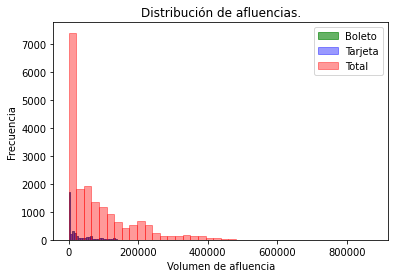

In [ ]:
#Histograma distriubcion de frecuencia y volumen de afluencia Diapositiva 16
plt.hist(datatransporte['afluencia_boleto'], edgecolor='green', color='green', alpha=0.6, bins = 40, label='Boleto')
plt.hist(datatransporte['afluencia_tarjeta'], edgecolor='blue', color = 'blue', alpha=0.4, bins = 40, label='Tarjeta')
plt.hist(datatransporte['afluencia_total_preliminar'], edgecolor='red', color = 'red', alpha=0.4, bins = 40, label='Total')

plt.title('Distribución de afluencias.')
plt.legend(loc='best')
plt.xlabel('Volumen de afluencia')
plt.ylabel('Frecuencia')
plt.show()

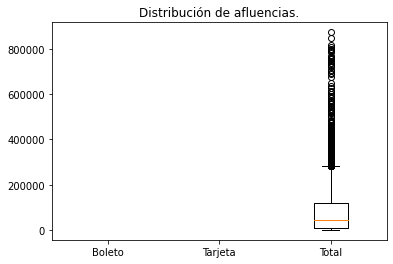

In [ ]:
#Boxplot Diapositiva 17
boleto = datatransporte['afluencia_boleto']
tarjeta = datatransporte['afluencia_tarjeta']
total = datatransporte['afluencia_total_preliminar']
 
plt.boxplot([datatransporte['afluencia_boleto'], datatransporte['afluencia_tarjeta'], datatransporte['afluencia_total_preliminar']],
            patch_artist = False, labels = ['Boleto', 'Tarjeta', 'Total'])
plt.title('Distribución de afluencias.')
plt.show()

In [ ]:
# Que dia de la semana tiene mas uso el transporte publico? DIapositiva 18
diamas = datatransporte.groupby('dia')['afluencia_total_preliminar'].agg(['sum','count', 'max'])
diamas.sort_values('sum',ascending=False)

,sum,count,max
dia,,,
Martes,239477843.0,2667,820067.0
Jueves,238240944.0,2649,802291.0
Viernes,237182340.0,2626,874324.0
Lunes,228317986.0,2665,770843.0
Miércoles,202951991.0,2246,807048.0
Sábado,197344970.0,2615,747252.0
Domingo,128866694.0,2631,454374.0
Míercoles,37592985.0,413,303257.0


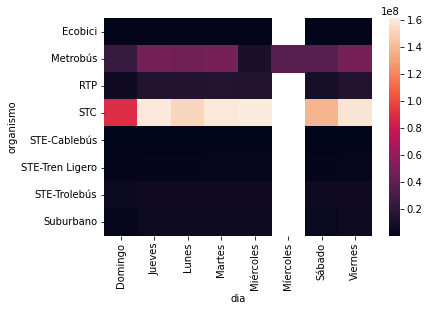

In [ ]:
#Heat Map dia mas transitado y organismoDiapositiva 19
heatmap1 = datatransporte.groupby(['organismo', 'dias'], as_index = False).agg({'afluencia_total_preliminar': 'sum'})

heatmap_day = heatmap1.pivot(index = 'organismo', columns ='dia', values = 'afluencia_total_preliminar')
sns.heatmap(heatmap_day)

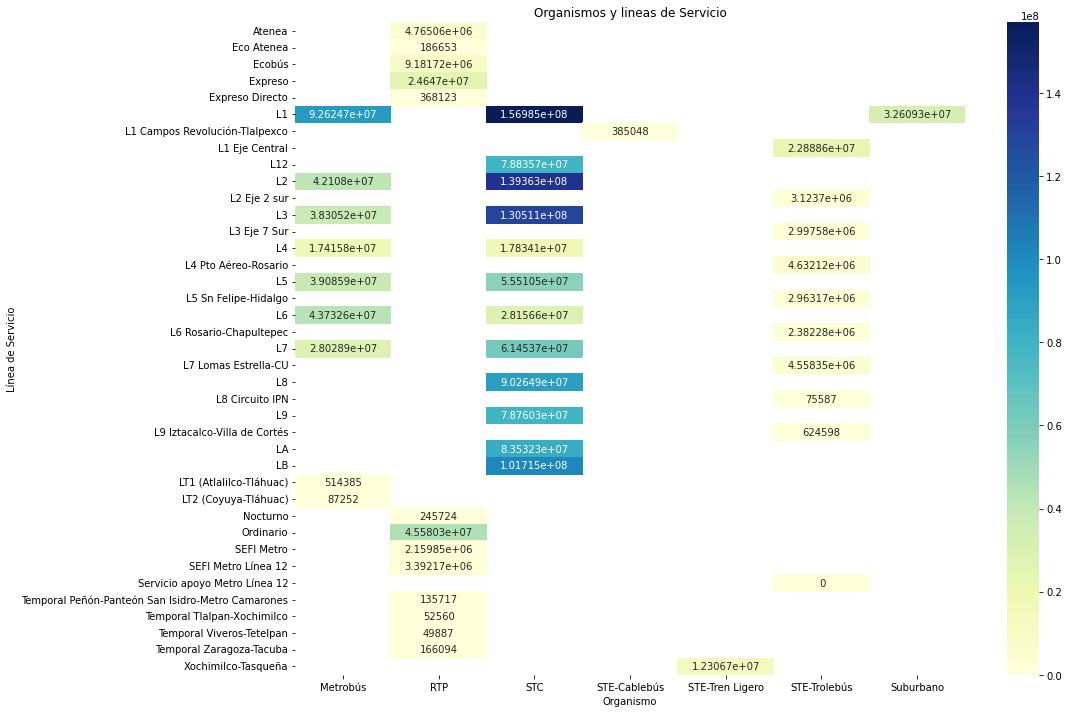

In [ ]:
#¿Cuál es la combinación de organismo y línea de servicio con más usuarios? Diapositiva 20
transporte= datatransporte.groupby(['organismo', 'linea_servicio'], as_index = False).agg({'afluencia_total_preliminar': 'sum'}).sort_values(['afluencia_total_preliminar'],ascending=False)

plt.figure(figsize = (15,12))

transporteorg = transporte.pivot(index = 'linea_servicio', columns ='organismo', values = 'afluencia_total_preliminar')
heat_transporte = sns.heatmap(transporteorg, annot= True, cmap='YlGnBu', fmt='2g')

heat_transporte.set(xlabel='Organismo', ylabel='Línea de Servicio', title = 'Organismos y lineas de Servicio')

heat_transporte

In [ ]:
#¿Cuál es la línea de servicio más utilizada? diapositiva 21
stc = datatransporte[datatransporte['organismo'] == 'STC']
stc = stc.groupby('linea_servicio')['afluencia_total_preliminar'].sum().sort_values(ascending=False)

stc = stc /sum(stc) * 100
stc.round(2)

linea_servicio
L1     15.35
L2     13.62
L3     12.76
LB      9.94
L8      8.82
LA      8.17
L12     7.71
L9      7.70
L7      6.01
L5      5.43
L6      2.75
L4      1.74
Name: afluencia_total_preliminar, dtype: float64

TRANSFORMACION DE DATOS

In [ ]:
#Eliminacion de datos nulos Diapositiva 22
nulos = datatransporte 
nulos = nulos.dropna(how = 'any')

exploracion = nulos.shape[0] / datatransporte.shape[0] * 100
exploracion = round(exploracion, 2)

print(exploracion)

19.23


In [ ]:
#¿Cuántos valores duplicados hay?  Diapositiva 23
datatransporte.duplicated().sum()

0

In [ ]:
#Cambiando Formatos Diapositiva 24
datatransporte['fecha'].dt.weekday
datatransporte['fecha'].dt.day

0         1
1         2
2         3
3         4
4         5
         ..
18709    28
18710    29
18711    30
18712     1
18713     2
Name: fecha, Length: 18714, dtype: int64

In [ ]:
#Limpieza de datos Diapositiva 25
contar = datatransporte[datatransporte['organismo'] == 'Metrobús'].shape[0]

contiene = datatransporte[datatransporte['organismo'].str.contains('Metrob')].shape[0]

print(contar)
print(contiene)

3461
3461


In [ ]:
#Diapositiva 26
temporal = datatransporte[datatransporte['linea_servicio'].str.contains('Temporal', na=False)]
temporal['linea_servicio'].nunique()

4